Nama : Septian Hadi Nugroho                                    
NIM : 1227050122                              
Kelas D                                   

UTS Praktikum Pembelajaran Mesin                              

# **Import Library**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# **Memuat Dataset**

In [28]:
df = pd.read_csv('dataset_buys _comp.csv')

# **Exploratory Data Analysis (EDA)**

### 1. Memahami Struktur Data

In [29]:
print("Dataset dari CSV:")
print(df.head())
print("\nInformasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))
print("\nJumlah nilai pada setiap kolom:")
for column in df.columns:
    print(f"{column}: {df[column].value_counts()}")

Dataset dari CSV:
          Age  Income Student Credit_Rating  Buys_Computer
0         Tua  Tinggi      Ya         Buruk              0
1  Paruh Baya  Tinggi      Ya          Baik              1
2  Paruh Baya  Rendah   Tidak         Buruk              1
3         Tua  Rendah   Tidak          Baik              1
4         Tua  Rendah      Ya          Baik              1

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            1000 non-null   object
 1   Income         1000 non-null   object
 2   Student        1000 non-null   object
 3   Credit_Rating  1000 non-null   object
 4   Buys_Computer  1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB
None

Statistik Deskriptif:
               Age  Income Student Credit_Rating  Buys_Computer
count         1000    1000    1000          1000    1000.00

### 2. Memeriksa Data yang Hilang

In [30]:
print("\nCek Missing Values:")
print(df.isnull().sum())


Cek Missing Values:
Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64


### 3. Memeriksa Data Duplikat

In [31]:
print(df.duplicated().sum())

949


### 4. Analisis Distribusi

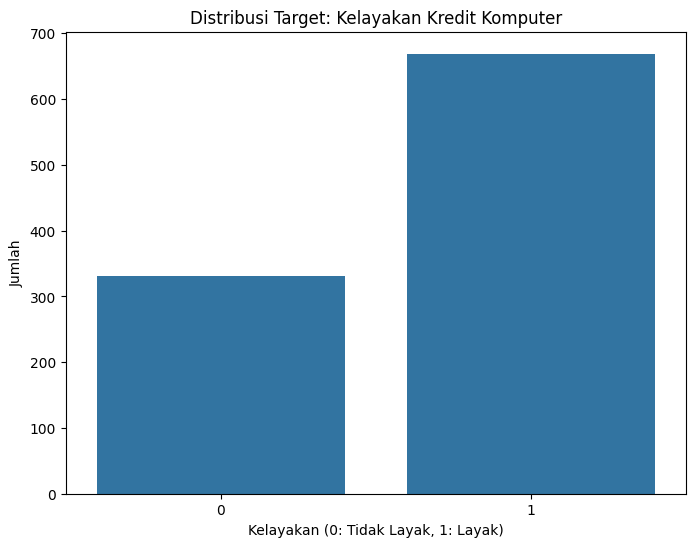

In [32]:
# Analisis distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='Buys_Computer', data=df)
plt.title('Distribusi Target: Kelayakan Kredit Komputer')
plt.xlabel('Kelayakan (0: Tidak Layak, 1: Layak)')
plt.ylabel('Jumlah')
plt.show()

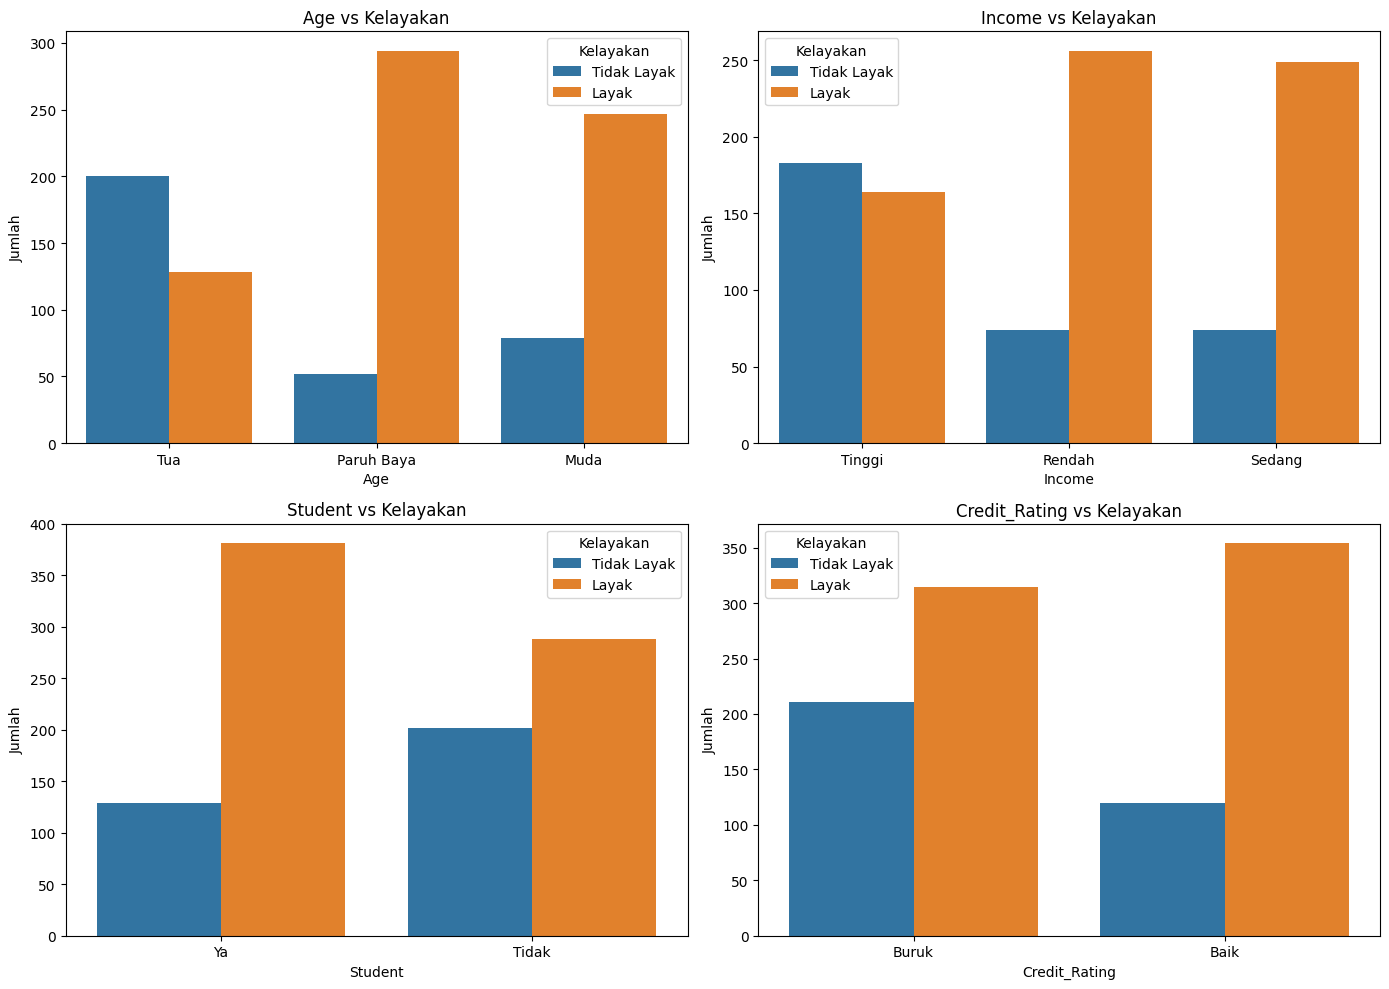

In [33]:
# Analisis hubungan antar fitur
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['Age', 'Income', 'Student', 'Credit_Rating']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    sns.countplot(x=feature, hue='Buys_Computer', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Kelayakan')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Jumlah')
    axes[row, col].legend(title='Kelayakan', labels=['Tidak Layak', 'Layak'])

plt.tight_layout()
plt.show()

# **Preprocessing Data**

In [34]:
# Encoding fitur kategorikal menggunakan LabelEncoder
label_encoders = {}
X_encoded = df.copy()

for column in ['Age', 'Income', 'Student', 'Credit_Rating']:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le
    print(f"Encoding untuk {column}:", dict(zip(le.classes_, le.transform(le.classes_))))

# Pisahkan fitur dan target
X = X_encoded.drop('Buys_Computer', axis=1)
y = X_encoded['Buys_Computer']

# Pembagian data training dan testing (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nUkuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)

Encoding untuk Age: {'Muda': np.int64(0), 'Paruh Baya': np.int64(1), 'Tua': np.int64(2)}
Encoding untuk Income: {'Rendah': np.int64(0), 'Sedang': np.int64(1), 'Tinggi': np.int64(2)}
Encoding untuk Student: {'Tidak': np.int64(0), 'Ya': np.int64(1)}
Encoding untuk Credit_Rating: {'Baik': np.int64(0), 'Buruk': np.int64(1)}

Ukuran data training: (700, 4)
Ukuran data testing: (300, 4)


# **Membangun Model Naive Bayes**

In [35]:
# Inisialisasi model Naive Bayes untuk fitur kategorikal
nb_model = CategoricalNB()

# Melatih model
nb_model.fit(X_train, y_train)

CategoricalNB()

# **Evaluasi Model**


Probabilitas prediksi:
[[0.15138182 0.84861818]
 [0.09854209 0.90145791]
 [0.18885915 0.81114085]
 [0.09965478 0.90034522]
 [0.54959877 0.45040123]
 [0.37242019 0.62757981]
 [0.10057958 0.89942042]
 [0.15138182 0.84861818]
 [0.37242019 0.62757981]
 [0.10171268 0.89828732]
 [0.10057958 0.89942042]
 [0.42783844 0.57216156]
 [0.18885915 0.81114085]
 [0.15138182 0.84861818]
 [0.26424182 0.73575818]
 [0.09854209 0.90145791]
 [0.05157826 0.94842174]
 [0.18540197 0.81459803]
 [0.10057958 0.89942042]
 [0.36951189 0.63048811]
 [0.49807109 0.50192891]
 [0.32276873 0.67723127]
 [0.10057958 0.89942042]
 [0.18885915 0.81114085]
 [0.10057958 0.89942042]
 [0.09965478 0.90034522]
 [0.15595839 0.84404161]
 [0.05157826 0.94842174]
 [0.76115983 0.23884017]
 [0.48927484 0.51072516]
 [0.22179971 0.77820029]
 [0.76115983 0.23884017]
 [0.37242019 0.62757981]
 [0.10171268 0.89828732]
 [0.18885915 0.81114085]
 [0.32276873 0.67723127]
 [0.27082458 0.72917542]
 [0.09965478 0.90034522]
 [0.54959877 0.45040123]
 

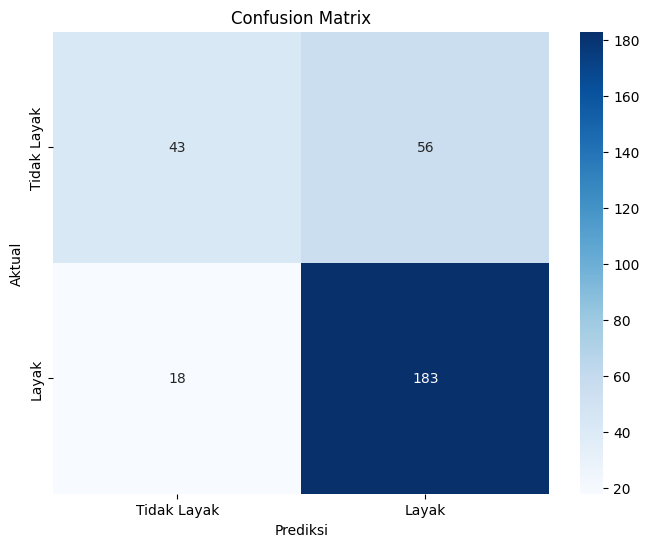


Laporan Klasifikasi:
              precision    recall  f1-score   support

 Tidak Layak       0.70      0.43      0.54        99
       Layak       0.77      0.91      0.83       201

    accuracy                           0.75       300
   macro avg       0.74      0.67      0.68       300
weighted avg       0.75      0.75      0.73       300


Akurasi Model: 0.7533 (75.33%)


In [36]:
# Prediksi pada data testing
y_pred = nb_model.predict(X_test)

# Hitung probabilitas pada setiap kelas
y_prob = nb_model.predict_proba(X_test)
print("\nProbabilitas prediksi:")
print(y_prob)

# Evaluasi performa model
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Tidak Layak', 'Layak'],
            yticklabels=['Tidak Layak', 'Layak'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Laporan klasifikasi lengkap
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Tidak Layak', 'Layak']))

# Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")